In [12]:
# Import TensorFlow
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import glob
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
from imblearn.over_sampling import RandomOverSampler

In [13]:
train = pd.read_csv("train.csv")
train = train.sort_values(by=["unique_id"]).reset_index(drop=True)

In [14]:
images = []
for filepath in glob.iglob('data-10/*.png'):
    img = cv2.imread(filepath)
    images.append(img)
 

In [42]:
train_images, test_images, train_labels, test_labels = train_test_split(images, train["class"], test_size=0.3, random_state=0, stratify = train["class"], shuffle=True)

In [20]:
print(train_images.shape[0])

298


In [43]:
train_images = np.array(train_images)
test_images = np.array(test_images)

ValueError: cannot reshape array of size 1065600000 into shape (555,1,800)

In [35]:
print(train_images.shape)

(298, 1920000)


In [45]:
reshaped_X = train_images.reshape(train_images.shape[0],-1)

#oversampling
oversample = RandomOverSampler()
oversampled_X, oversampled_y  = oversample.fit_resample(reshaped_X , train_labels)

new_X = oversampled_X.reshape(-1,800,800,3)

In [46]:
train_images = new_X

In [47]:
train_images, test_images = train_images / 255.0, test_images / 255.0

In [53]:
print(train_images.shape)
print(train_labels.shape)

(555, 800, 800, 3)
(298,)


In [48]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(800, 800, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [49]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [54]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# An epoch means training the neural network with all the
# training data for one cycle. Here I use 10 epochs
history = model.fit(train_images, oversampled_y, epochs=2, 
                    validation_data=(test_images, test_labels))

Epoch 1/2
17/18 [===========================>..] - ETA: 14s - loss: 10.9484 - accuracy: 0.2555

5/5 - 9s - loss: 2.7361 - accuracy: 0.3333 - 9s/epoch - 2s/step


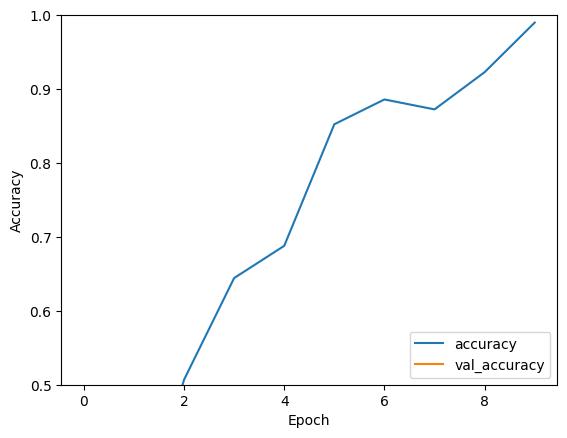

In [10]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,
                                     test_labels,
                                     verbose=2)


In [11]:
print('Test Accuracy is',test_acc)

Test Accuracy is 0.3333333432674408
